## Import Required library

In [114]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Read IEA CCUS data

In [115]:
# Load your dataset and select required columns
cc_cc_columns_to_select = ['Country', 'Announcement','Project Status','Sector',\
                     'Announced capacity (low) (Mt CO2/yr)',\
                        'Announced capacity (high) (Mt CO2/yr)']

cc_data = pd.read_excel('data/IEA CCUS Projects Database 2023.xlsx',\
                   sheet_name = 'CCUS Projects Database', usecols=cc_cc_columns_to_select)

# Display the first few rows of the dataset
display(cc_data.head())

,Country,Announcement,Project Status,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr),Sector
0,France,2019.0,Planned,1.0,1.0,Iron and steel
1,United States,2022.0,Planned,NaN,NaN,Hydrogen/ammonia
2,United Arab Emirates,2007.0,Operational,0.8,0.8,Iron and steel
3,United Arab Emirates,2020.0,Planned,1.9,1.9,Natural gas processing
4,United Arab Emirates,2020.0,Planned,2.3,2.3,Natural gas processing


## Read World Emission Data

In [116]:
#Read world Emission
emission_col = ['country', 'year','total_ghg']
emission_data = pd.read_csv('data/World Emission Data.csv', usecols  = emission_col)

#view head
display(emission_data.tail())

#view info
emission_data.info()

,country,year,total_ghg
13735,Zimbabwe,2018.0,116.76
13736,Zimbabwe,2019.0,116.03
13737,Zimbabwe,2020.0,113.20
13738,Zimbabwe,2021.0,0.00
13739,Zimbabwe,2022.0,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13740 entries, 0 to 13739
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    13740 non-null  object 
 1   year       13740 non-null  float64
 2   total_ghg  13740 non-null  float64
dtypes: float64(2), object(1)
memory usage: 322.2+ KB


In [117]:
#change year from float to int
emission_data['year'] = emission_data['year'].astype('int')
#filter emission to >= 2006
emission_data = emission_data.loc[emission_data['year'] >= 2006]
emission_data.head()

,country,year,total_ghg
36,Afghanistan,2006,17.39
37,Afghanistan,2007,18.34
38,Afghanistan,2008,21.47
39,Afghanistan,2009,24.44
40,Afghanistan,2010,28.71


In [118]:
# Basic information about the dataset
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                573 non-null    object 
 1   Announcement                           553 non-null    float64
 2   Project Status                         573 non-null    object 
 3   Announced capacity (low) (Mt CO2/yr)   425 non-null    float64
 4   Announced capacity (high) (Mt CO2/yr)  425 non-null    float64
 5   Sector                                 573 non-null    object 
dtypes: float64(3), object(3)
memory usage: 27.0+ KB


In [119]:
#Aggrigate by year, sector
group_col  = ['Country', 'Announcement','Project Status','Sector']
val = {'Announced capacity (low) (Mt CO2/yr)':'sum','Announced capacity (high) (Mt CO2/yr)':'sum'}

#convert to data frame and reset index.  
cc_announced_capacity = pd.DataFrame(cc_data.groupby(group_col).aggregate(val)).reset_index().round(2).sort_values(by= 'Announcement' , ascending= False)

#Convert annaouncment yeat to int
cc_announced_capacity['Announcement'] = cc_announced_capacity['Announcement'].astype(int)

#view head
cc_announced_capacity.head()

,Country,Announcement,Project Status,Sector,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr)
56,Canada,2023,Planned,Other industry,1.0,1.3
78,"France, Italy",2023,Planned,CO2 transport,6.4,6.4
87,"Germany, Norway",2023,Planned,CO2 transport,30.0,30.0
114,Japan,2023,Planned,CO2 T&S,0.0,0.0
26,Belgium,2023,Planned,Cement,0.8,0.8


## Explore Carbon Capture Data from IEA

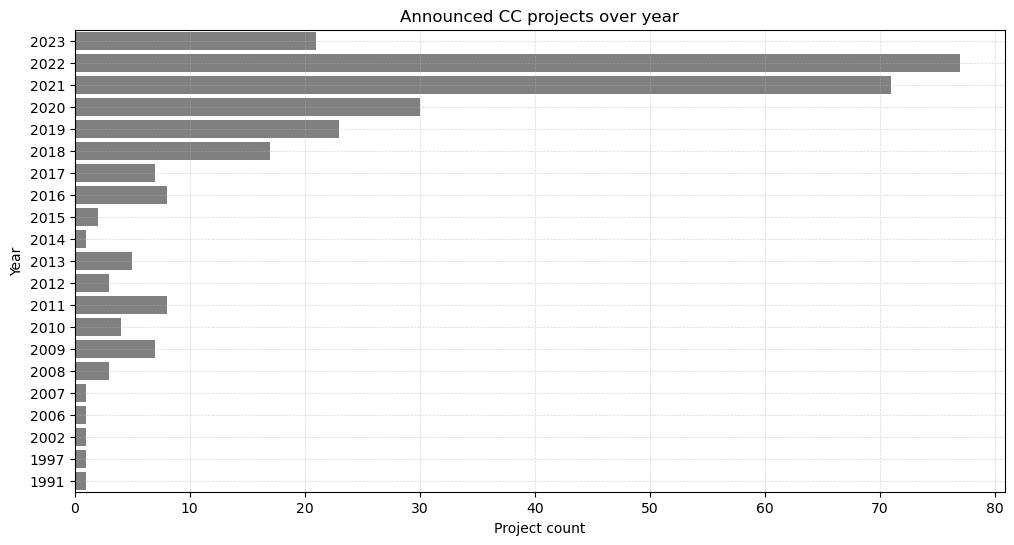

In [120]:
# Plot announced projects over years
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.countplot(y='Announcement', data=cc_announced_capacity,\
               order= cc_announced_capacity['Announcement'].value_counts().index.sort_values(ascending= False),
               color='gray')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('Announced CC projects over year')
plt.xlabel('Project count')
plt.ylabel('Year')
# Show the plot
plt.show()


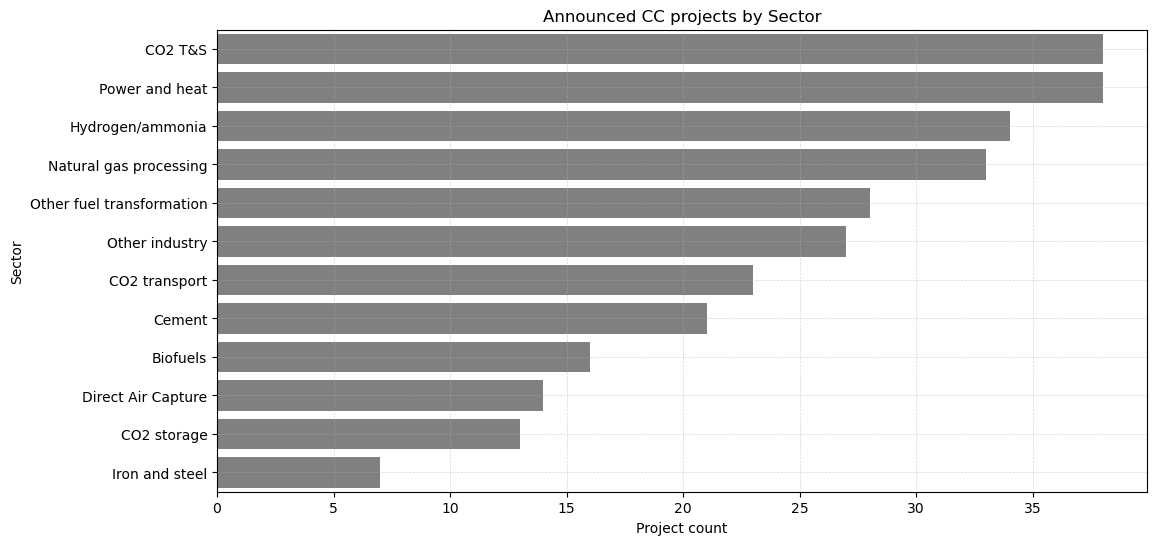

In [121]:
# Plot announced projects by sector
project_count_by_sector = pd.DataFrame(cc_announced_capacity['Sector'].value_counts().sort_values(ascending= False).reset_index())
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.barplot(y='Sector', x = 'count',data=project_count_by_sector,color='gray')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('Announced CC projects by Sector')
plt.xlabel('Project count')
plt.ylabel('Sector')
# Show the plot
plt.show()

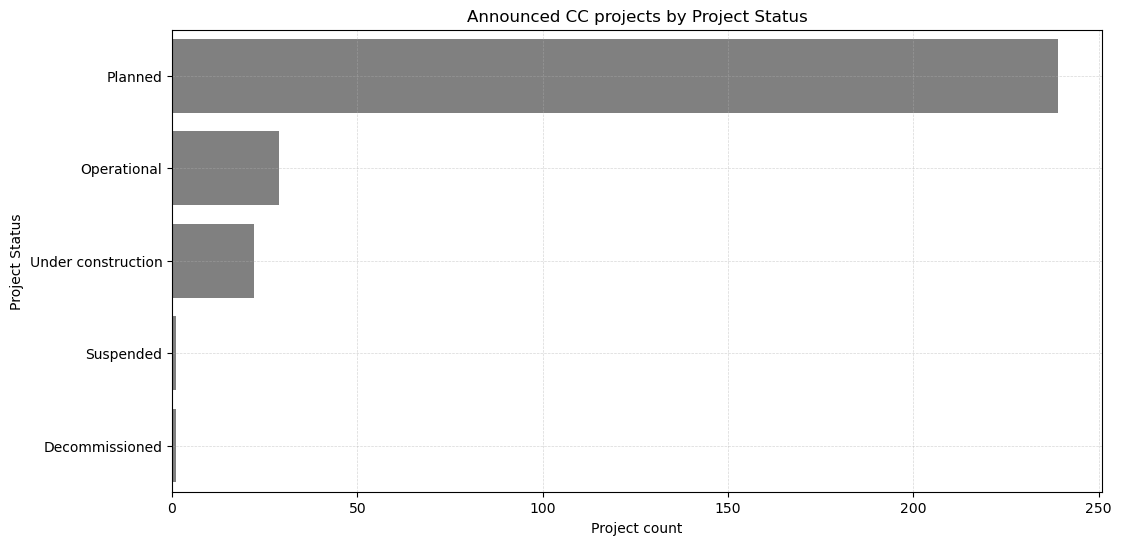

In [122]:
# Plot announced projects status
project_count_by_status = pd.DataFrame(cc_announced_capacity['Project Status'].value_counts().sort_values(ascending= False).reset_index())
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.barplot(y='Project Status', x = 'count',data = project_count_by_status,color='gray')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('Announced CC projects by Project Status')
plt.xlabel('Project count')
plt.ylabel('Project Status')
# Show the plot
plt.show()


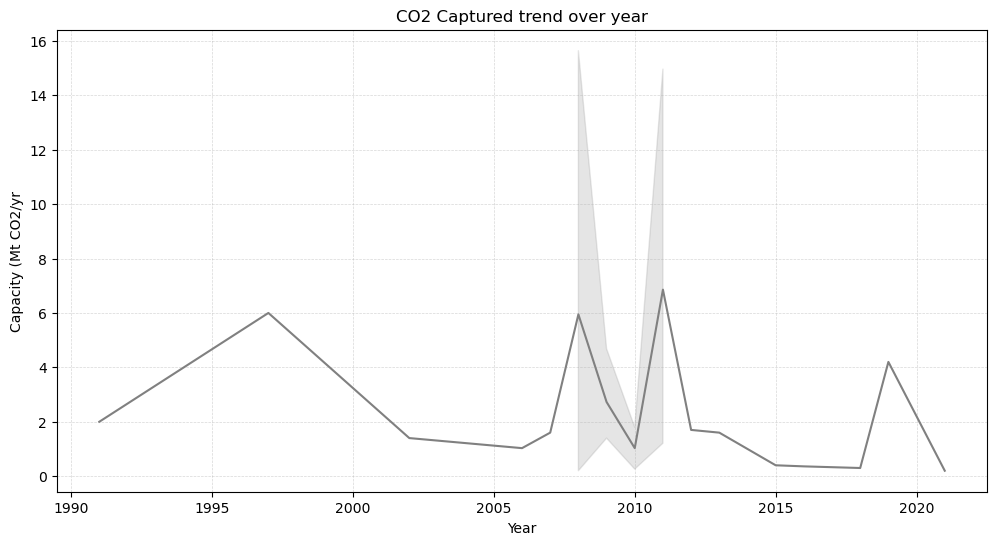

In [123]:
#Filter out palnned, and under constraction CCUS projects
high_low_capacity = cc_announced_capacity.loc[cc_announced_capacity['Project Status'].isin(['Operational', 'Suspended','Decommissioned'])]

#plot Announced high and low Carbon Capture 
#get columns required
high_low_capacity = high_low_capacity[['Announcement','Announced capacity (low) (Mt CO2/yr)','Announced capacity (high) (Mt CO2/yr)',]]


#aggrigate capacity to yearly level
high_low_capacity.groupby('Announcement').agg({'Announced capacity (low) (Mt CO2/yr)':'sum','Announced capacity (high) (Mt CO2/yr)':'sum'})
high_low_capacity['max capacity'] = high_low_capacity['Announced capacity (low) (Mt CO2/yr)'] +  high_low_capacity['Announced capacity (high) (Mt CO2/yr)'] 



#plot
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.lineplot(y='max capacity', x = 'Announcement',data=high_low_capacity,color='gray')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('CO2 Captured trend over year')
plt.xlabel('Year')
plt.ylabel('Capacity (Mt CO2/yr')
# Show the plot
plt.show()

## Explore World Emission Data

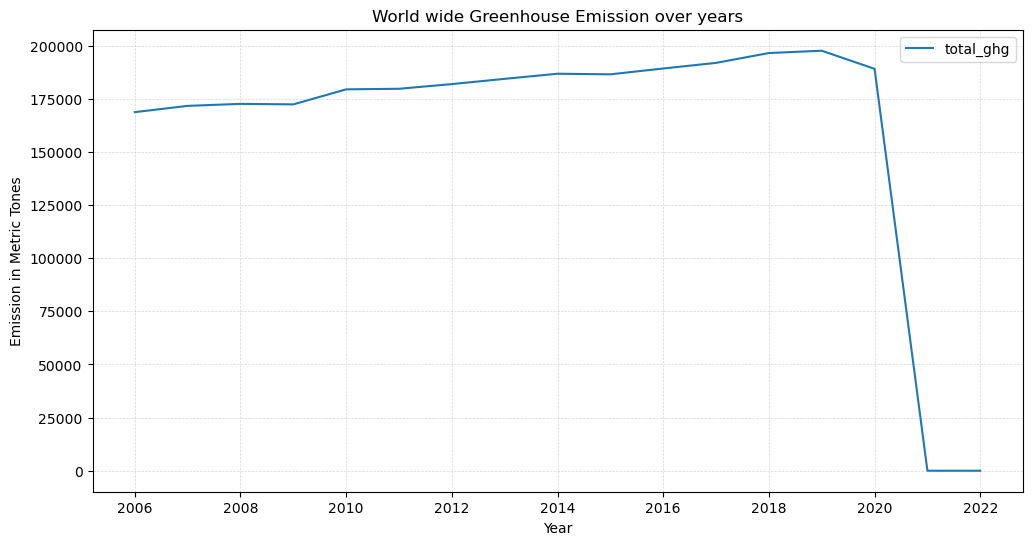

In [124]:
#Aggrigate emission data to yearly level
yearly_emission  = emission_data.groupby('year').agg({'total_ghg':'sum'})

yearly_emission.plot(figsize= (12,6))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('World wide Greenhouse Emission over years')
plt.xlabel('Year')
plt.ylabel('Emission in Metric Tones')
plt.show()

In [125]:
#Aggrigate emission data to countery level
ten_year_emission  = emission_data.groupby('country').agg({'total_ghg':'sum'})

#calculate avarge 10 year emission 
calc_meadian = ten_year_emission.median()[0]

#Fillter all countery that have emmion value greater than median value
ten_year_emission_above_median_value = ten_year_emission.loc[ten_year_emission['total_ghg'] >=  calc_meadian]

#Fillter all countery that have emmion value less than median value
ten_year_emission_below_median_value = ten_year_emission.loc[ten_year_emission['total_ghg'] <  calc_meadian]


print(f"Ten year median emiisson is  {calc_meadian} Metric Tone")
print('-'*100)
print(f"{ten_year_emission_above_median_value.shape[0]} countries have total 10 year gh emission above 10 year median value")
print('-'*100)

print(f"{ten_year_emission_below_median_value.shape[0]} countries have total 10 year gh emission below 10 year median value")
print('-'*100)

Ten year median emiisson is  368.9 Metric Tone
----------------------------------------------------------------------------------------------------
130 countries have total 10 year gh emission above 10 year median value
----------------------------------------------------------------------------------------------------
129 countries have total 10 year gh emission below 10 year median value
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Top counties by Green House Emission')

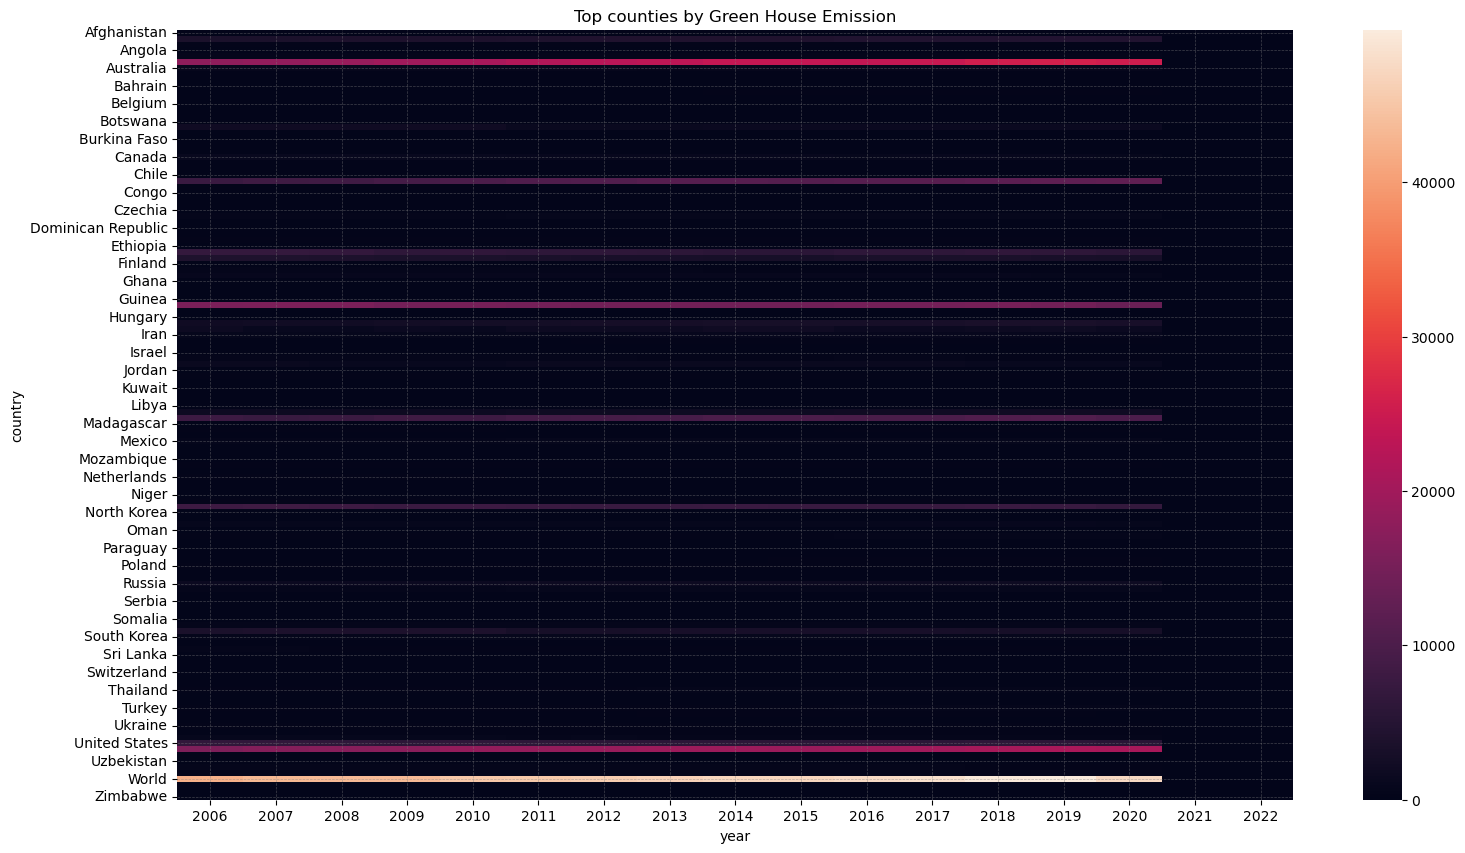

In [126]:
#list of top countries
top_countries = ten_year_emission_above_median_value.index.to_list()

#Filter top counties 
emission_data_top_country = emission_data.loc[emission_data['country'].isin(top_countries)]

#Plot to show top countries emission trend
top_crosstb = pd.crosstab(index= emission_data_top_country.country,columns= emission_data_top_country.\
                          year,values=emission_data_top_country.total_ghg,aggfunc= 'sum')
plt.figure(figsize=(18, 10))
sns.heatmap(top_crosstb)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title("Top counties by Green House Emission")


Text(0.5, 1.0, 'Bottom counties by Green House Emission')

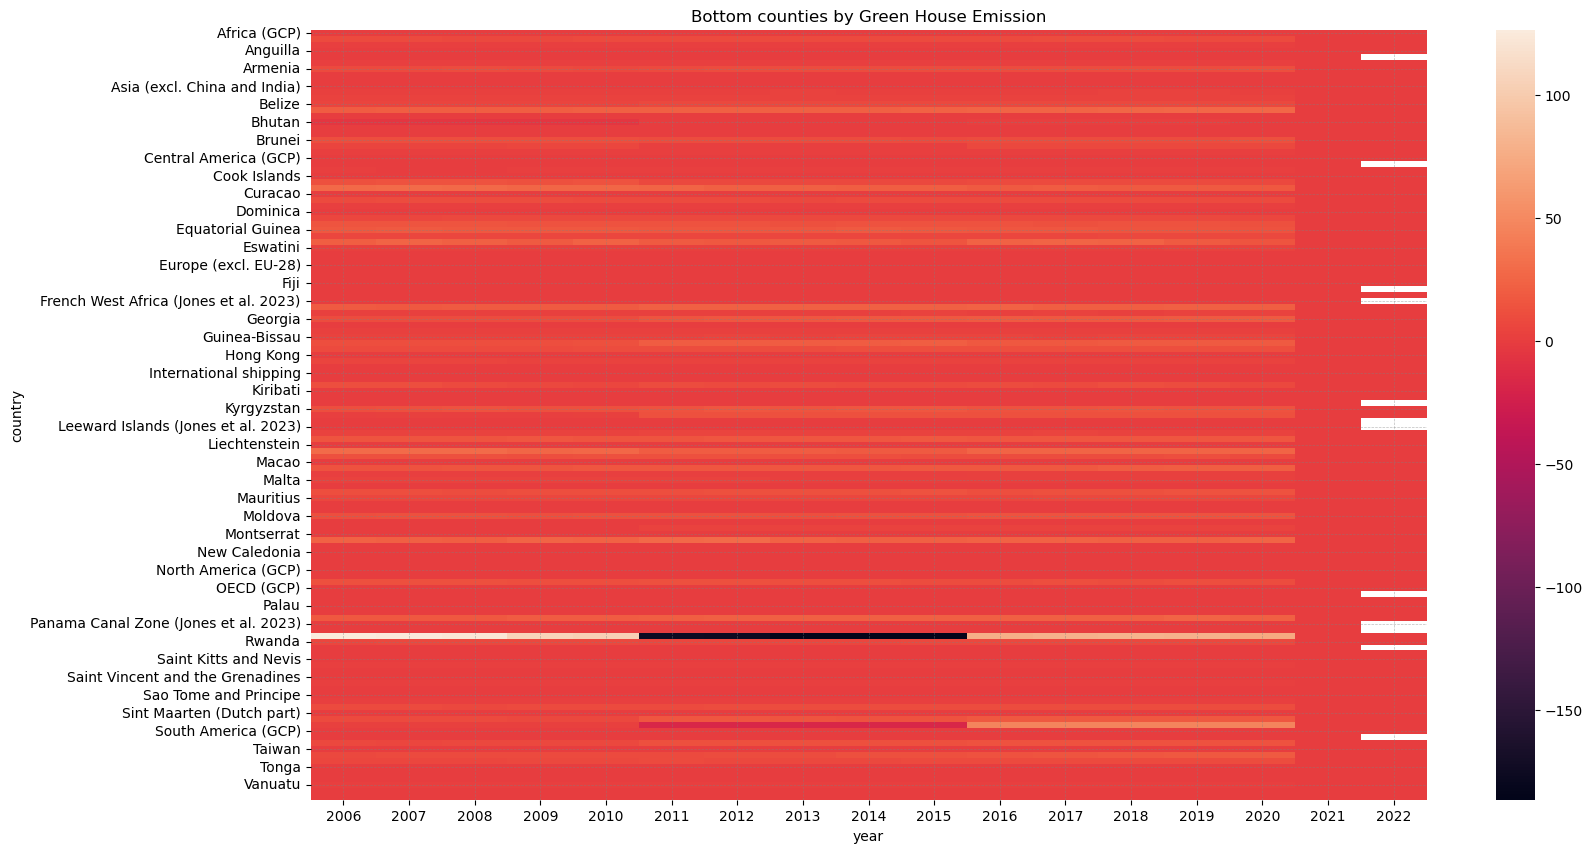

In [127]:
#list of bottom countries
top_countries = ten_year_emission_below_median_value.index.to_list()

#Filter bottom counties 
emission_data_bottom_country = emission_data.loc[emission_data['country'].isin(top_countries)]

#Plot to show top countries emission trend
top_crosstb = pd.crosstab(index= emission_data_bottom_country.country,columns= emission_data_bottom_country.\
                          year,values=emission_data_bottom_country.total_ghg,aggfunc= 'sum')
plt.figure(figsize=(18, 10))
sns.heatmap(top_crosstb)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title("Bottom counties by Green House Emission")

## Aggrigate both data set by year and combine 

In [134]:
#filter cc data to 2006 and above 
ten_year_cc_captured = high_low_capacity.loc[high_low_capacity['Announcement'] >= 2006]

#Reanme columns
ten_year_cc_captured.rename(columns= {'Announcement':'year'},inplace=True)

#Set year as index
ten_year_cc_captured.set_index('year',inplace= True)

#Combine both data set
emission_cc_data = pd.merge(ten_year_cc_captured, yearly_emission, left_index=True, right_index=True)

#Convert emission vlue to 1000s
emission_cc_data['total_ghg'] = emission_cc_data['total_ghg'].apply(lambda x: x / 1000).round(2)

#head
display(emission_cc_data.head())

display(emission_cc_data.tail())

,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr),max capacity,total_ghg
year,,,,
2006,0.43,0.60,1.03,168.67
2007,0.80,0.80,1.60,171.61
2008,7.82,7.82,15.64,172.56
2008,1.00,1.00,2.00,172.56
2008,0.10,0.10,0.20,172.56


,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr),max capacity,total_ghg
year,,,,
2016,0.18,0.18,0.36,189.20
2016,0.18,0.18,0.36,189.20
2018,0.15,0.15,0.30,196.47
2019,2.10,2.10,4.20,197.56
2021,0.10,0.10,0.20,0.00


Text(0, 0.5, 'Value in MT OC2')

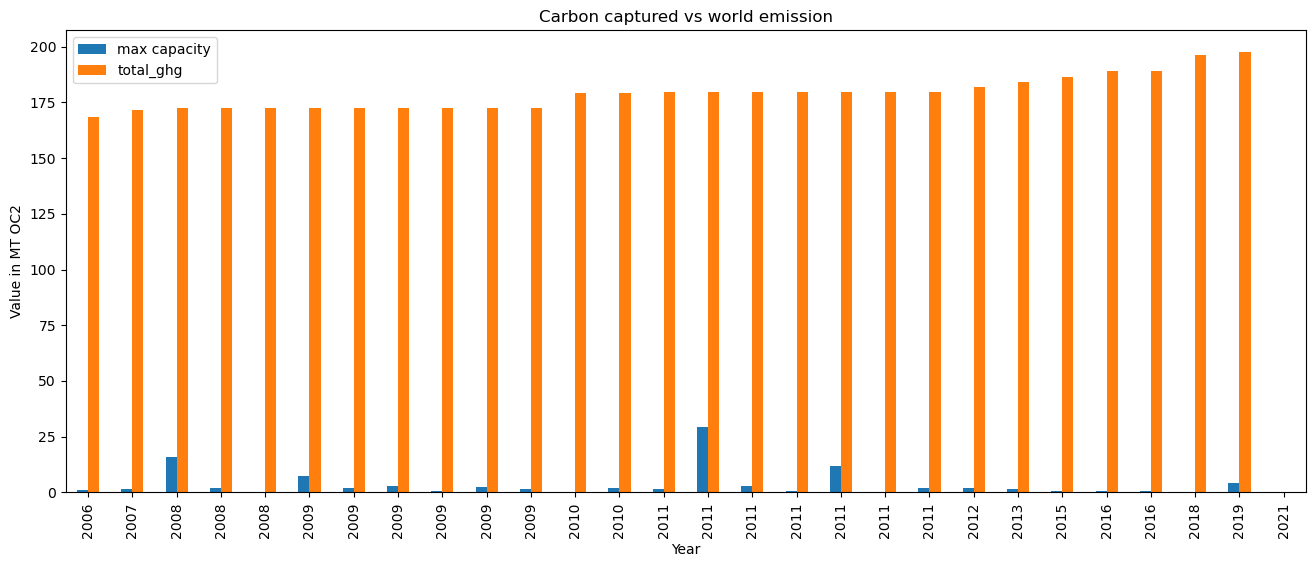

In [139]:
emission_cc_data[['max capacity','total_ghg']].plot(figsize= (16,6), title = 'Carbon captured vs world emission',kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Value in MT OC2')